# Código Modelagem - Decision Tree


## Análise exploratória dos Dados

# 1. Importando arquivos

In [38]:
import pandas as pd
import numpy as np
df = pd.read_csv('kc_house_data.csv') #DataFrame das informações dos imóveis 
df_backup = df.copy() #DataFrame de backup das informações dos imóveis 

# 2. Construção do Histograma

Construção de alguns histogramas tendo como base os dados da planilha de imoveis, afim de se ter uma melhor visualização dos dados nela contidos.

In [39]:
histogram_build = 'sqft_living'   #Variável selecionada para a análise, metro quadrado do imóvel 

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

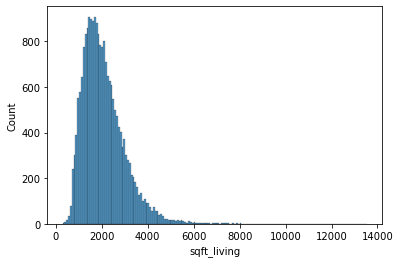

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = df, x = histogram_build)

# 3. Filtrando o CEP selecionado

Para o meu grupo, usar apenas cep (zipcode): 98001

In [41]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

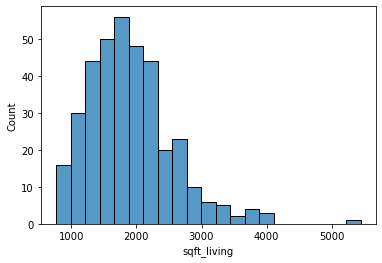

In [42]:
df_zipcode = df[df['zipcode'] == 98001]

sns.histplot(data = df_zipcode, x = histogram_build)

# 4.1 Aplicando os filtros necessários 

Aplicando todos os filtros necessários para a construção da árvore de decisão, tendo como base os dados de CEP = 98001

In [43]:
#Definindo preço por metro quadrado 
price_sqft = df['price']/df['sqft_living']
df_backup['price_sqft'] = price_sqft

# 4.2 Filtrando o preço do imóvel

#### Definindo o que seria abaixo, dentro ou fora da média

Nas estatísticas, um escore-z (ou score padrão) de uma observação é o número de desvios padrão acima ou abaixo da média do preço por metro quadrado do id. Para calcular um score z, é necessário saber a média desses valores e seu respectivo desvio padrão.

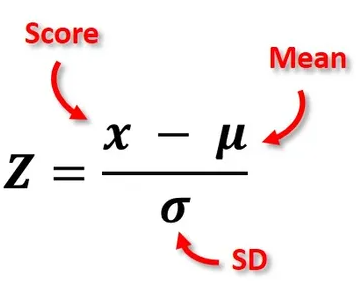

In [44]:
from PIL import Image

imagem = Image.open('imagens/z_score.png')

imagem

In [45]:
def class_output(x):  #criando uma função para agregar os valores do output
    if(x<-0.5):
        return 0
    elif(x<0.5):
        return 1
    else:
        return 2

df_zipcode = 98001
df_backup_zipcode = df_backup[df_backup['zipcode']==98001] #Novo DataFrame com o recorte do zipcode

media_price_sqft = df_backup_zipcode['price_sqft'].mean()  #Calculando a média por metro quadrado 

std_price_sqft = df_backup_zipcode['price_sqft'].std()  #Calculando o desvio padrão para calcular o Zscore

zscore = (df_backup_zipcode['price_sqft']-media_price_sqft) / std_price_sqft   #Calculando o zscore
df_backup_zipcode['zscore']  = zscore #Incluindo zscore no DF backup

df_backup_zipcode['class'] = df_backup_zipcode['zscore'].apply(class_output) #Armazenamos os parâmetros do output numa função 'class' e automatizamos o processo com a função apply

df_backup_zipcode

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,zscore,class
38,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,1969,0,98001,47.3341,-122.282,1290,7800,196.721311,1.340020,2
67,3717000160,20141009T000000,287000.0,4,2.50,2240,4648,2.0,0,0,...,2005,0,98001,47.3378,-122.257,2221,4557,128.125000,-0.687635,0
114,8961960160,20141028T000000,480000.0,4,2.50,3230,16171,2.0,0,3,...,2001,0,98001,47.3183,-122.253,2640,8517,148.606811,-0.082208,1
213,4014400292,20150114T000000,465000.0,3,2.50,2714,17936,2.0,0,0,...,2005,0,98001,47.3185,-122.275,2590,18386,171.333825,0.589585,2
292,1115450240,20141022T000000,360000.0,4,2.50,2160,9528,2.0,0,0,...,1992,0,98001,47.3341,-122.255,2280,9937,166.666667,0.451627,1
322,3353400435,20140721T000000,230000.0,3,2.00,1450,11204,1.0,0,0,...,2003,0,98001,47.2639,-122.252,1520,9518,158.620690,0.213795,1
354,9262800171,20150324T000000,252000.0,4,1.50,1550,19800,1.0,0,0,...,1969,0,98001,47.3117,-122.270,1640,22654,162.580645,0.330848,1
440,3353401710,20140923T000000,227950.0,3,1.50,1670,8230,1.0,0,0,...,1954,0,98001,47.2613,-122.255,2077,4910,136.497006,-0.440164,1
441,8159610030,20140722T000000,196000.0,3,2.25,2070,11576,2.0,0,0,...,1974,0,98001,47.3417,-122.271,1890,7519,94.685990,-1.676066,0
641,3329500060,20140728T000000,305000.0,4,2.50,2250,9091,1.0,0,0,...,1982,0,98001,47.3360,-122.269,1540,7802,135.555556,-0.467993,1


<AxesSubplot:xlabel='price_sqft', ylabel='Count'>

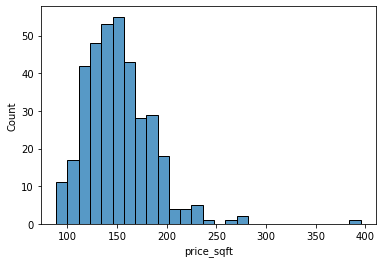

In [46]:
sns.histplot(data = df_backup_zipcode, x = 'price_sqft')

# 5. Discretizando por K-média

### Discretizando por preço

Discretização é o processo de colocar valores em buckets de modo que haja um número limitado de possíveis estados. Os próprios blocos são tratados como valores ordenados e discretos.
A dicotomização é o caso especial de discretização em que o número de classes discretas é 2, que pode aproximar uma variável contínua como variável binária (criando uma dicotomia para fins de modelagem, como na classificação binária).

In [47]:
from sklearn.cluster import KMeans
import numpy as np
pricesT=[]
prices= df_backup_zipcode['price'].values
for price in prices:
      pricesT.append([price])
kmeans_price = KMeans(n_clusters=3, random_state=0).fit(pricesT) #Clusters=3 nos garantiu um melhor resultado

prices_disc=[]
for price in prices:
  price_disc=kmeans_price.predict([[price]])
  prices_disc.append(price_disc[0])

df_backup_zipcode['price_discretized']=prices_disc
df_backup_zipcode.head()

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,zscore,class,price_discretized
38,7895500070,20150213T000000,240000.0,4,1.0,1220,8075,1.0,0,0,...,0,98001,47.3341,-122.282,1290,7800,196.721311,1.340020,2,2
67,3717000160,20141009T000000,287000.0,4,2.5,2240,4648,2.0,0,0,...,0,98001,47.3378,-122.257,2221,4557,128.125000,-0.687635,0,0
114,8961960160,20141028T000000,480000.0,4,2.5,3230,16171,2.0,0,3,...,0,98001,47.3183,-122.253,2640,8517,148.606811,-0.082208,1,1
213,4014400292,20150114T000000,465000.0,3,2.5,2714,17936,2.0,0,0,...,0,98001,47.3185,-122.275,2590,18386,171.333825,0.589585,2,1
292,1115450240,20141022T000000,360000.0,4,2.5,2160,9528,2.0,0,0,...,0,98001,47.3341,-122.255,2280,9937,166.666667,0.451627,1,0


<AxesSubplot:xlabel='price', ylabel='zipcode'>

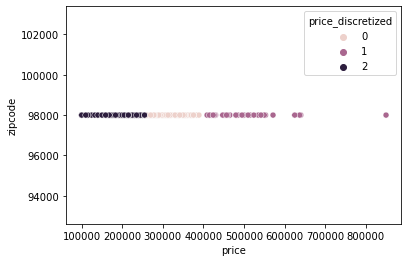

In [48]:
sns.scatterplot(x='price',y='zipcode',hue='price_discretized',data=df_backup_zipcode)

# 5.1 Discretizando por longitude e latitude

In [49]:
from sklearn.cluster import KMeans
import numpy as np
locations= df_backup_zipcode[['lat','long']].values
kmeans_loc = KMeans(n_clusters=3, random_state=0).fit(locations)

locations_disc=[]
for location in locations:
  location_disc=kmeans_loc.predict([location])
  locations_disc.append(location_disc[0])

df_backup_zipcode['locations_discretized']=locations_disc
df_backup_zipcode.head()

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,zscore,class,price_discretized,locations_discretized
38,7895500070,20150213T000000,240000.0,4,1.0,1220,8075,1.0,0,0,...,98001,47.3341,-122.282,1290,7800,196.721311,1.340020,2,2,2
67,3717000160,20141009T000000,287000.0,4,2.5,2240,4648,2.0,0,0,...,98001,47.3378,-122.257,2221,4557,128.125000,-0.687635,0,0,2
114,8961960160,20141028T000000,480000.0,4,2.5,3230,16171,2.0,0,3,...,98001,47.3183,-122.253,2640,8517,148.606811,-0.082208,1,1,0
213,4014400292,20150114T000000,465000.0,3,2.5,2714,17936,2.0,0,0,...,98001,47.3185,-122.275,2590,18386,171.333825,0.589585,2,1,0
292,1115450240,20141022T000000,360000.0,4,2.5,2160,9528,2.0,0,0,...,98001,47.3341,-122.255,2280,9937,166.666667,0.451627,1,0,2


# 6. Criando modelo

Criando um modelo de árvore sem incluir nossos parâmetros, nossa árvore, embora com mais de 90% de precisão no chatbot, ficou muito inviável de automatizar devido ao seu tamanho extenso. 

In [50]:
from sklearn import tree 
import graphviz 
import pydot
import pydotplus
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

X=df_backup_zipcode[['bedrooms', 'yr_built', 'bathrooms', 'floors']]  
Y=df_backup_zipcode[['class']]

clf = tree.DecisionTreeClassifier() #Gerando a árvore sem filtros
clf = clf.fit(X, Y)

cn=['Acima da ', 'Dentro da Média', 'Acima da média']

dot_data=tree.export_graphviz(clf,out_file=None,feature_names=X.columns, filled=True, rounded=True,class_names = cn, special_characters=True)
graph = graphviz.Source(dot_data)

dotfile = StringIO()
tree.export_graphviz(clf, out_file=dotfile)
(graph,)=pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("tree.png")  #Salvando em PNG



Criando uma árvore utilizando parâmetros para reduzir sua extensão:

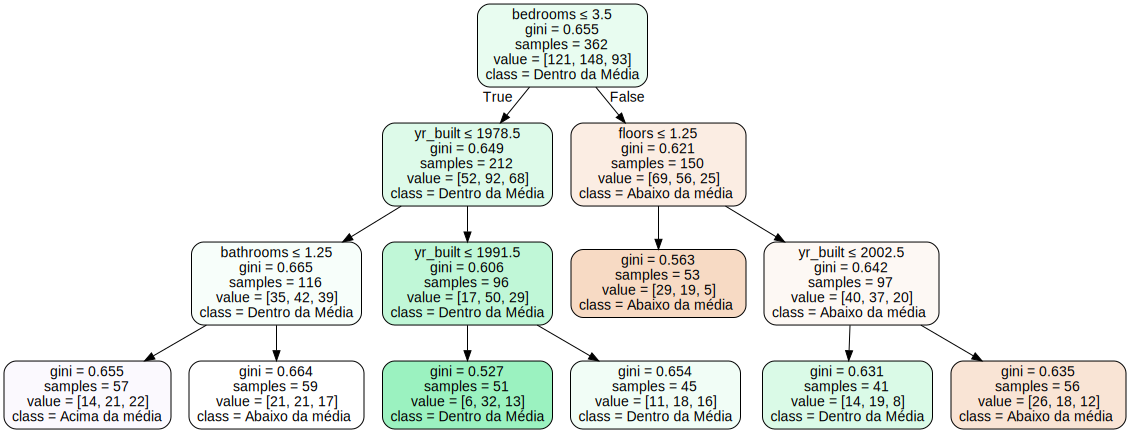

In [54]:
from sklearn import tree 
import graphviz 


X=df_backup_zipcode[['bedrooms', 'yr_built', 'bathrooms', 'floors']]  
Y=df_backup_zipcode[['class']]

clf = tree.DecisionTreeClassifier(min_samples_leaf=40, min_impurity_decrease=0.001, min_samples_split=40)
clf = clf.fit(X, Y)

cn=['Abaixo da média ', 'Dentro da Média', 'Acima da média']

dot_data=tree.export_graphviz(clf,out_file=None,feature_names=X.columns, filled=True, rounded=True,class_names = cn, special_characters=True)
graph = graphviz.Source(dot_data)

graph


# 6.1 Verificando os melhores parâmetros

Verificando a correlação dos dados com a biblioteca seaborn, quanto mais próximo de 0, menor a correlação.

<AxesSubplot:>

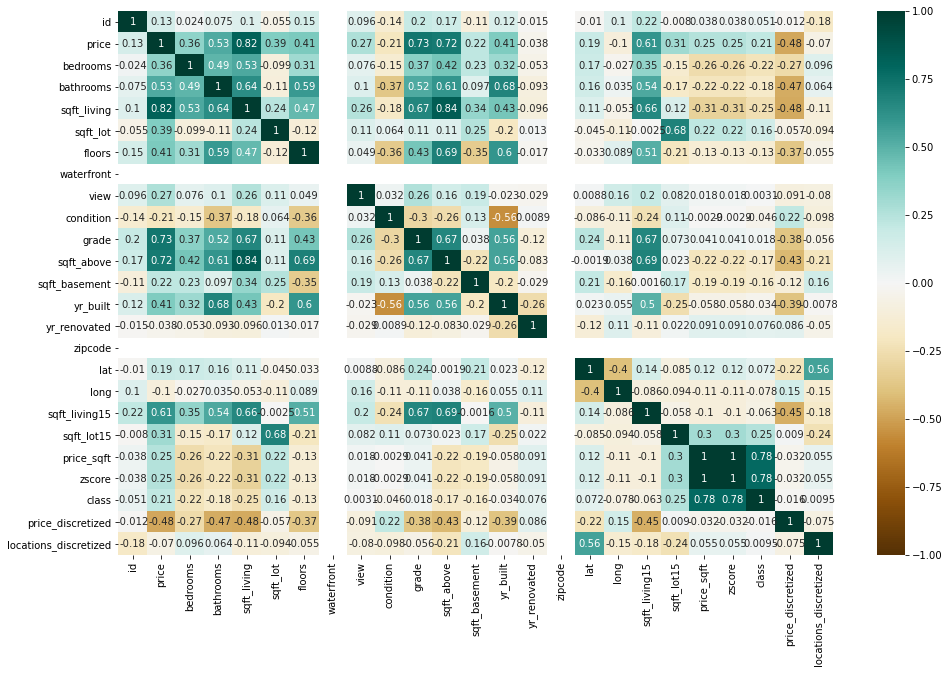

In [14]:

plt.figure(figsize=(16, 10))
sns.heatmap(df_backup_zipcode.corr(),vmin=-1, vmax=1,annot = True, cmap='BrBG')


In [ ]:
p1 = int(input('Qual a quantidade de quartos?'))
p2 = int(input('Qual a nota dada ao imóvel?'))
p3 = int(input('Qual o ano de construção?'))
p4 = float(input('Quantidade de banheiros:'))

resposta_modelo = clf.predict([[p1,p2,p3,p4]])

In [ ]:
b = 'teste'
a = int(resposta_modelo)
if a == 1:
    b = 'Preço por m² está dentro da média (até 0.5 desvpad longe da média populacional)'
elif a == 2:
    b = 'Preço está acima da média (mais que 0.5 desvpad da média populacional)'
else:
    b = 'Preço está abaixo da média'

In [276]:
b

'Preço por m² está dentro da média (até 0.5 desvpad longe da média populacional)'

In [277]:
clf.score(X,Y) #Porcentagem de precisão da resposta

0.9419889502762431